# Лабораторная работа 6

In [25]:
!pip install sympy
import numpy as np
from sympy import symbols, Eq, solve


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Задание 1

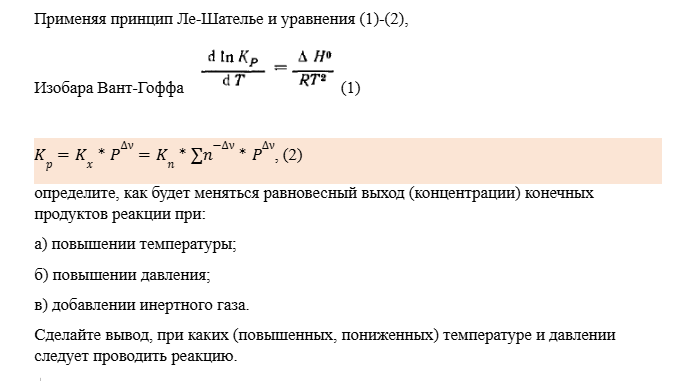


In [1]:
# C2H4 + C2 => C2H6
а)
Hf_C2H4 = 52.5      # C2H4 (этилен), газ
Hf_C2H6 = -84.7     # C2H6 (этан), газ
Hf_C2 = 820.0       # C2 (нестабильная форма углерода, приблизительное значение)

H = Hf_C2H6 - (Hf_C2H4 + Hf_C2)

print(f"Изменение энтальпии реакции: {H:.1f} кДж/моль")
# (dH < 0) => при повышении температуры реакция сместится влево (по принципу Ле-Шателье и уравнению(1))

б) продуктов реакции больше => чем больше давление тем правее будет реакция (по принципу Ле-Шателье)

в) ничего не произойдёт (по принципу Ле-Шателье)

Изменение энтальпии реакции: -957.2 кДж/моль


### Задание 2
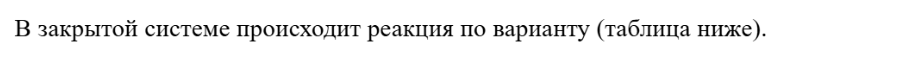
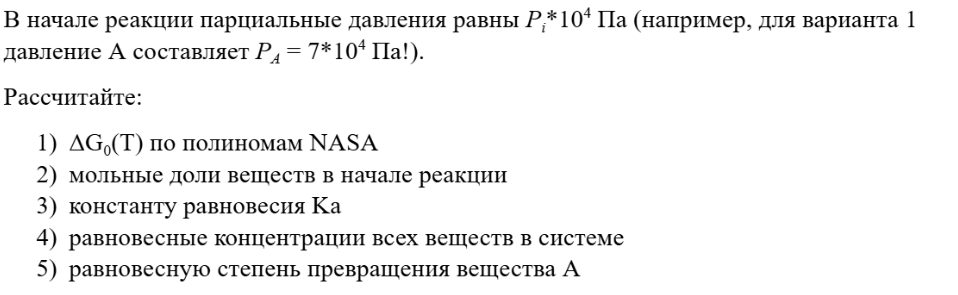
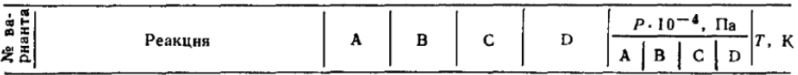


In [24]:
# Коэффициенты NASA (низкие T)
a_C2H4 = [4.47039, 0.0294337, -0.0000932121, 1.28208e-07, -5.3026e-11, 50991.3, 2.43131]
a_C6H6 = [2.92230, 0.0367974, 0.00105094, -1.58169e-06, 6.61473e-10, 132289.0, 4.65881]
a_H2   = [2.67992, 0.0317540, -0.0000724769, 8.35104e-08, -3.70898e-11, -917.935, 0.683010]

R = 8.3145  # Дж/моль·К
T = 700     # К

def H(a, T):
    return (
        a[0] +
        a[1] * T / 2 +
        a[2] * T**2 / 3 +
        a[3] * T**3 / 4 +
        a[4] * T**4 / 5 +
        a[5] / T
    ) * R * T

def S(a, T):
    return (
        a[0] * np.log(T) +
        a[1] * T +
        a[2] * T**2 / 2 +
        a[3] * T**3 / 3 +
        a[4] * T**4 / 4 +
        a[6]
    ) * R

# ΔG = ΔH - TΔS
delta_G = (
    H(a_C6H6, T) + (3 * H(a_H2, T)) - H(a_C2H4, T)
) - T * (
    S(a_C6H6, T) +  (3 * S(a_H2, T)) - S(a_C2H4, T)
)

K = np.exp(-delta_G / (R * T))

print("a) ΔG =", delta_G,   "Дж/моль")
print("б) Мольные доли в начале реакции [3C2H4 + H2 => 3H6] равны: 3/7, 1/7, 3/7")
print("в) Kа =", K)

p1 = 2e4
p2 = 0.7e4
p3 = 3e4
v1 = 3
v2 = 1
v3 = 3
K_p = p2**v2 * p3**v3 / p1**v1
p = p1 + p2 + p3
dv = v2 + v3 - v1

x = symbols('x')
x = solve((3 + x)*(1 + x)/(3 - x) - K_p * p**(-dv), x)[1];

n1 = 3 - x
n2 = 1 + x
n3 = 3 + x
V = (v1 + v2 + v3) * 8.314 * 700 / p
C1 = n1/V
C2 = n1/V
C3 = n1/V

print(f"г) C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}")
print(f"д) {(3-x)/3:.3f}")

a) ΔG = -30475.43280695984 Дж/моль
б) Мольные доли для реакции [3C2H4 + H2 => 3H6] равны: 3/7, 1/7, 3/7
в) Kа = 187.9533337989702
г) C1 = 4.816, C2 = 4.816, C3 = 4.816
д) 1.147


### Задание 3
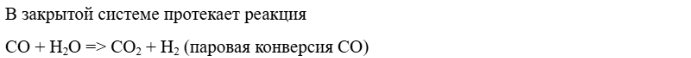
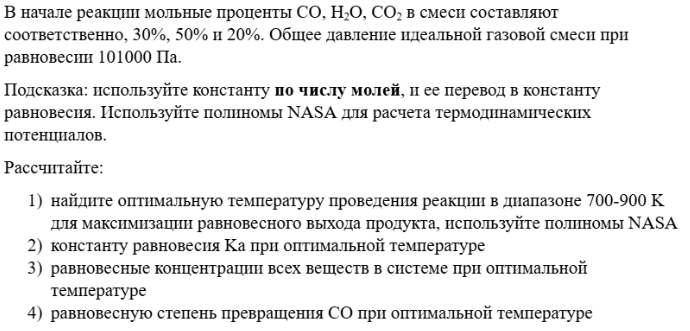

In [ ]:
# CO + H2O => CO2 + H2

# x = symbols('x')
# print("Решение: ", solve((0.2 + x)*x/((0.3 - x)*(0.5 - x)) - K, x)) # = 0.2962



In [43]:
# Коэффициенты NASA (низкие T)
# Коэффициенты NASA (низкие T)
a_CO    = [25.56759, 6.096130, 4.054656, -2.671301, 0.131021, -118.0089, 227.3665]
a_H2O   = [30.09200, 6.832514, 6.793435, -2.534480, 0.082139, -250.8810, 223.3967]
a_CO2   = [24.99735, 55.18696, -33.69137, 7.948387, -0.136638, -403.6075, 228.2431]
a_H2    = [33.066178, -11.363417, 11.432816, -2.772874, -0.158558, -9.980797, 172.707974]

R = 8.3145  # Дж/моль·К
T = 700     # К

def H(a, T):
    h_over_RT = (
        a[0] +
        a[1] * T / 2 +
        a[2] * T**2 / 3 +
        a[3] * T**3 / 4 +
        a[4] * T**4 / 5 +
        a[5] / T
    )
    return h_over_RT * R * T

def S(a, T):
    s_over_R = (
        a[0] * np.log(T) +
        a[1] * T +
        a[2] * T**2 / 2 +
        a[3] * T**3 / 3 +
        a[4] * T**4 / 4 +
        a[6]
    )
    return s_over_R * R
    
T = 900
delta_H =  H(a_CO2, T) + H(a_H2, T) - H(a_CO, T) - H(a_H2O, T) # =-485076806059933.75
# print(delta_H)
T = 700
delta_H =  H(a_CO2, T) + H(a_H2, T) - H(a_CO, T) - H(a_H2O, T) # =-136927501506862.86
# print(delta_H)
# (dH < 0) => по припципу Ле Шалантье чтобы сместить равновесие вправо нужно уменьшить температуру
print("a) Оптимальная температура проведения реакци: 700K")


# ΔG = ΔH - TΔS
delta_S = S(a_CO2, T) + S(a_H2, T) - S(a_CO, T) - S(a_H2O, T)
delta_G = delta_H - T * delta_S
print(delta_G)
K = np.exp(-delta_G / (R * T))
print("б) Kа =", K)

# CO + H2O => CO2 + H2
x = symbols('x')
print(f"в) x = {(solve( ((0.2 + x) * x)/((0.3 - x) * (0.5 - x)) - K, x)[1]):.3f} => реакция не пойдёт (C = C_0)")
print("г) = 1 (тк реакция не пошла)")

a) Оптимальная температура проведения реакци: 700K
33807940219768.33
б) Kа = 0.0
в) x = 0.000 => реакция не пойдёт (C = C_0)
г) = 1 (тк реакция не пошла)


### Теория

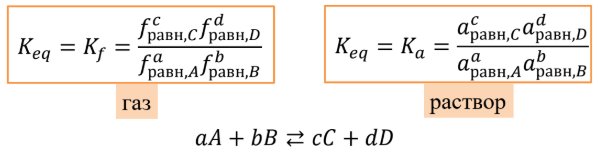
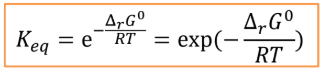
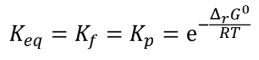
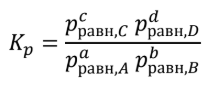
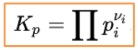
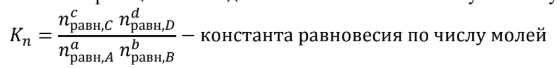
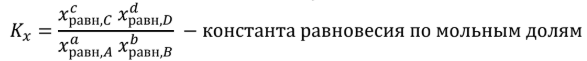

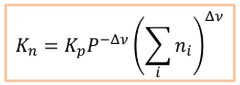
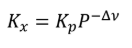
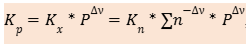
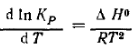